In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import requests
from io import StringIO

# Downloading the Titanic dataset
url = "https://github.com/datasciencedojo/datasets/raw/master/titanic.csv"
response = requests.get(url)
data = response.content.decode('utf-8')
titanic_df = pd.read_csv(StringIO(data))
train_data, test_data = train_test_split(titanic_df, test_size=0.2, random_state=42)

print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (712, 12)
Test data shape: (179, 12)


In [2]:
train_data.head()# test_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
331,332,0,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S
733,734,0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S
382,383,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S
704,705,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S


In [3]:
# Set PassengerId as an index
train_data = train_data.set_index("PassengerId")
test_data = test_data.set_index("PassengerId")

In [8]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
332,0,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S
734,0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S
383,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S
705,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S
814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S


## Plots

We will use some plots go see some patterns in our dataset

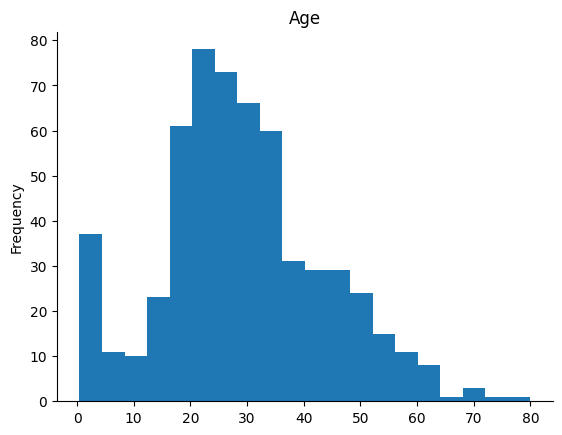

In [14]:
train_data['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

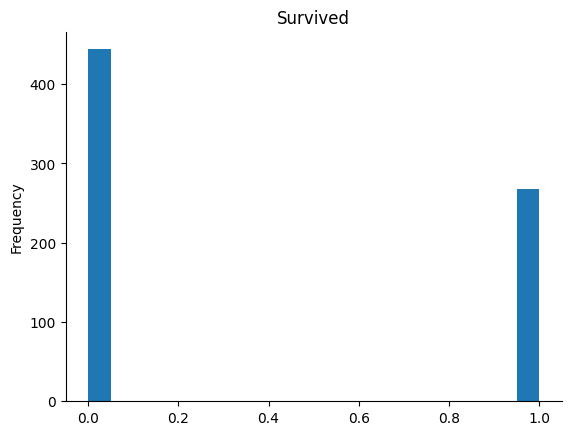

In [10]:
train_data['Survived'].plot(kind='hist', bins=20, title='Survived')
plt.gca().spines[['top', 'right',]].set_visible(False)

Text(0.5, 1.0, 'Male and Female counts')

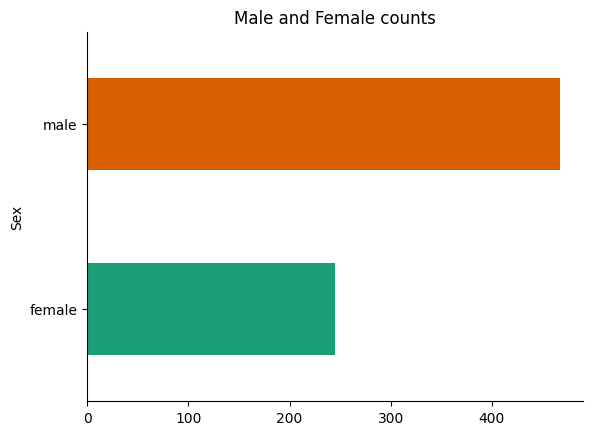

In [20]:
train_data.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title("Male and Female counts")

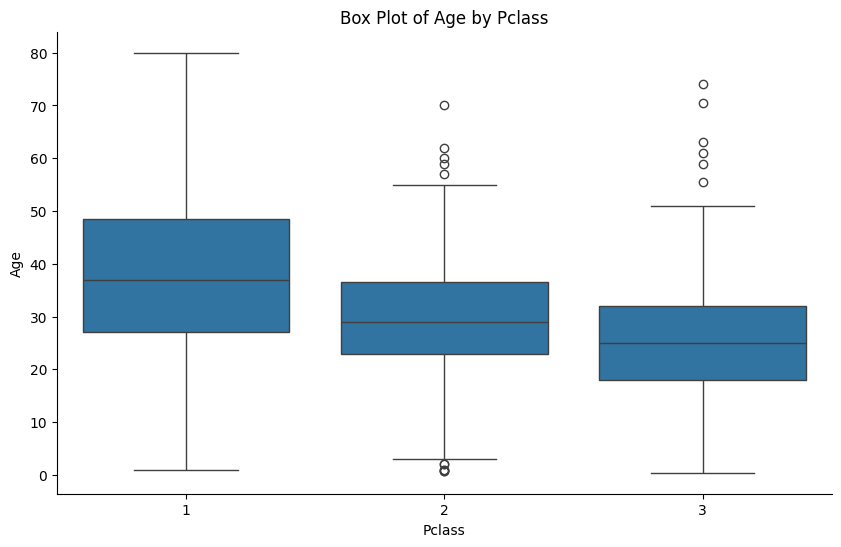

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data, x='Pclass', y='Age')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title('Box Plot of Age by Pclass')
plt.show()

<ipython-input-25-a34d0081bc7b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(train_data, x='Pclass', y='Embarked', inner='box', palette='Dark2')


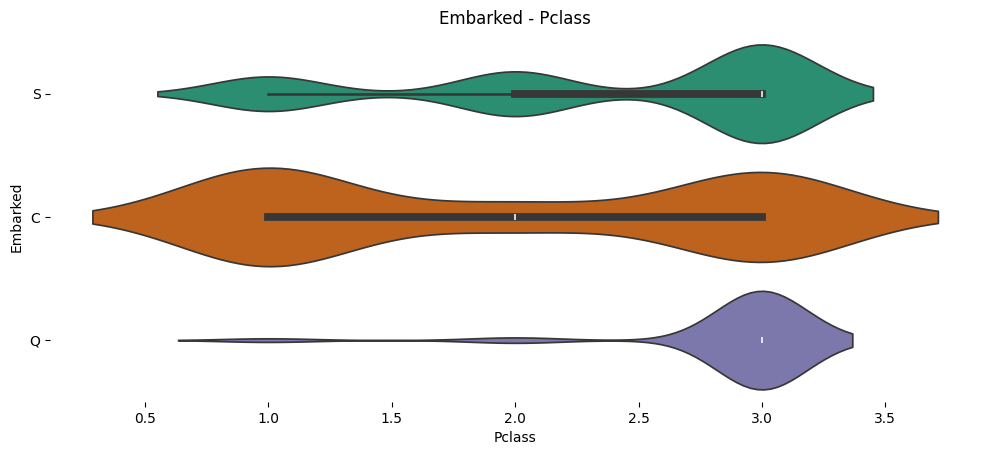

In [25]:
import seaborn as sns
figsize = (12, 1.2 * len(train_data['Embarked'].unique()))
plt.figure(figsize=figsize)
plt.title("Embarked - Pclass")
sns.violinplot(train_data, x='Pclass', y='Embarked', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

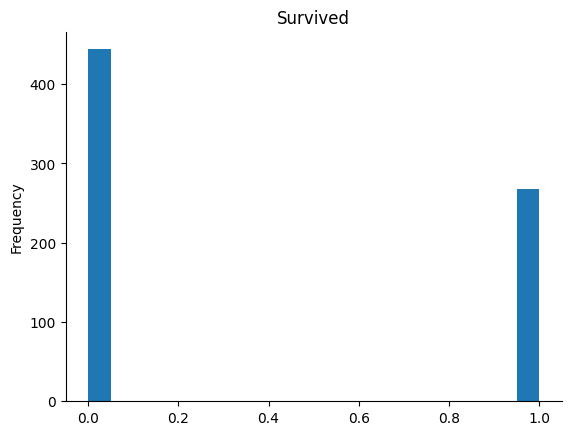

In [26]:
# @title Survived

from matplotlib import pyplot as plt
train_data['Survived'].plot(kind='hist', bins=20, title='Survived')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [27]:
# Get the median age of females
train_data[train_data["Sex"]=="female"]["Age"].median()

27.0

In [28]:
# Let's get basic overview of the dataset
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,572.000000,712.000000,712.000000,712.000000
mean,0.376404,2.330056,29.498846,0.553371,0.379213,32.586276
std,0.484824,0.824584,14.500059,1.176404,0.791669,51.969529
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.925000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,30.500000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
# Count how many people survived
train_data["Survived"].value_counts()

Survived
0    444
1    268
Name: count, dtype: int64

In [30]:
# Count for each categorical value it's value counts
print(train_data["Pclass"].value_counts())
print(train_data["Sex"].value_counts())
print(train_data["Embarked"].value_counts())

Pclass
3    398
1    163
2    151
Name: count, dtype: int64
Sex
male      467
female    245
Name: count, dtype: int64
Embarked
S    525
C    125
Q     60
Name: count, dtype: int64


## Preparing data for the model

Sorry, I know this is not correlated with data analysis, however I thought that it would be nice to show how some data wrangling can improve the outcome of machine learning model :).

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

In [32]:
from sklearn.preprocessing import OneHotEncoder
cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

In [33]:
from sklearn.compose import ColumnTransformer

num_attribs = ["Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Pclass", "Sex", "Embarked"]

preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

In [34]:
X_train = preprocess_pipeline.fit_transform(
    train_data[num_attribs + cat_attribs])
X_train

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[ 1.25364106, -0.47072241, -0.47934164, ...,  0.        ,
         0.        ,  1.        ],
       [-0.47728355, -0.47072241, -0.47934164, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.21508629, -0.47072241, -0.47934164, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.90745614,  1.23056874, -0.47934164, ...,  0.        ,
         0.        ,  1.        ],
       [-1.1696534 ,  0.37992316,  2.04874166, ...,  0.        ,
         0.        ,  1.        ],
       [-0.63114352, -0.47072241,  0.78470001, ...,  0.        ,
         0.        ,  1.        ]])

In [35]:
y_train = train_data["Survived"]
y_train.head()

PassengerId
332    0
734    0
383    0
705    0
814    0
Name: Survived, dtype: int64

We are now ready to train a classifier. Let's start with a `RandomForestClassifier` from `sklearn` library:

### RandomForest

In [36]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
# Make predictions on the test set
X_test = preprocess_pipeline.transform(test_data[num_attribs + cat_attribs])
y_pred = forest_clf.predict(X_test)

In [38]:
from sklearn.model_selection import cross_val_score

# Calculate model accuracy
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.799158841940532

### SVC

In [39]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

0.824413145539906

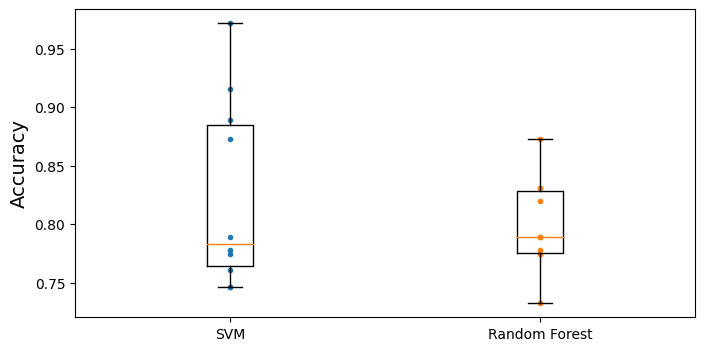

In [40]:
import matplotlib.pyplot as plt

# Lets visualize results for both models using box-plots
plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.boxplot([svm_scores, forest_scores], labels=("SVM","Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

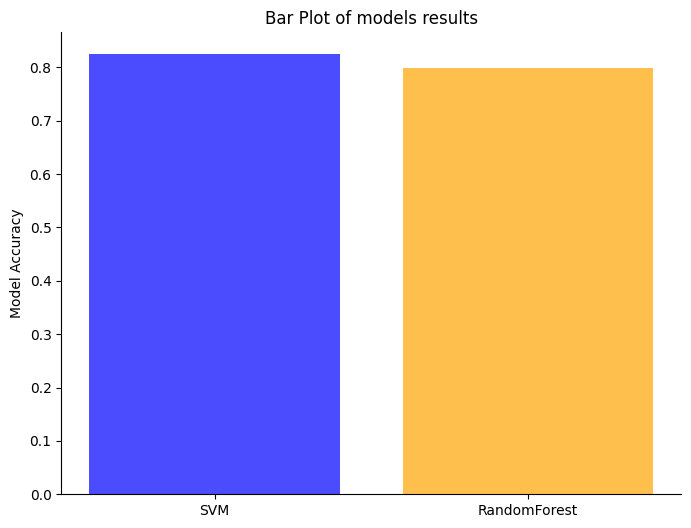

In [45]:
svm_score = svm_scores.mean()
forest_score = forest_scores.mean()

# Create the bar plot which will show our model results
plt.figure(figsize=(8, 6))
plt.bar(["SVM", "RandomForest"], [svm_score, forest_score], color=['blue', 'orange'], alpha=0.7)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.ylabel('Model Accuracy')
plt.title('Bar Plot of models results')
plt.show()